## Gregory M. Eirich
## Example 
## Lab #1

In [ ]:
Some preliminary set up code:

In [2]:
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt


In [3]:
os.chdir('C:/Users/gme2101/Desktop/Data Analysis Data') # change working directory

## I am using the codebook at http://www.thearda.com/Archive/Files/Codebooks/GSS2006_CB.asp ##

d = pd.read_csv("GSS.2006.csv")
d.head()

,vpsu,vstrat,adults,ballot,dateintv,famgen,form,formwt,gender1,hompop,...,away7,gender14,old14,relate14,relhh14,relhhd14,relsp14,where12,where6,where7
0,1,1957,1,3,316,2,1,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1957,2,2,630,1,2,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1957,2,2,314,2,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1957,1,1,313,1,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1957,3,1,322,2,2,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
for col in d.columns: 
    print(col)

vpsu
vstrat
adults
ballot
dateintv
famgen
form
formwt
gender1
hompop
id
intage
intid
intyrs
mode
oversamp
phase
race
reg16
region
relate1
relhh1
relhhd1
respnum
rvisitor
sampcode
sample
sex
size
spaneng
srcbelt
version
visitors
wtss
wtssall
wtssnr
xnorcsiz
year
hispanic
rplace
degree
hefinfo
wrkstat
racecen1
marital
phone
comprend
coop
feeused
hhrace
lngthinv
educ
childs
ethnum
age
cohort
intrace1
attend
inthisp
hhtype
hhtype1
earnrs
whoelse6
whoelse1
whoelse2
whoelse3
whoelse4
whoelse5
partyid
relig
teens
preteen
babies
reliten
dwelling
vote04
mar1
zodiac
old1
fund
polviews
income
income06
wrkslf
isco681
isco88
occ80
prestg80
wrkgovt
sei
intethn
intsex
indus80
eth1
trust
realinc
coninc
ethnic
health
union
gender2
relate2
relhh2
relhhd2
wksub
wksup
old2
mar2
widowed
unrelat
born
saqsex
weekswrk
family16
relig16
res16
sibs
parborn
happy
mobile16
satfin
finalter
relactiv
relexper
savesoul
class
pray
relpersn
relexp
god
reborn
finrela
sprtprsn
rellife
pres04
bible
vote00
rotapple
blkwhite

1-- I chose to look at a variable that investigates one of the Big Five dimensions of personality, as developed by psychologists.  This variable, ​big5a1​, is the respondent's level of agreement to the following statement: I see myself as someone who is reserved; so it is basically a measure of introversion.  

As Table 1 indicates, valid answers range from 1 to 5, where 1 represents strongagreement and 5 indicates strong disagreement (3=neither agreement or disagreement).  

The below table, Table 2, shows that a large plurality of Americans (42%) agree that they are reserved, while only roughly a quarter of Americans assert they are not reserved (21% disagreeand only 7% strongly disagree).  It is somewhat surprising how few Americans think of themselves as outgoing or bold, and yet few think of themselves as extremely shy (i.e., only 13% of people ​strongly​ agree they are reserved).  

There is a histogram of this variable as well, which represents the same results of what I was talking about.

From the codebook, Table 1 is:

1019) I see myself as someone who is reserved. (BIG5A1)		
				                TOTAL %
1) Strongly agree		        200	13.2
2) Agree			            632	41.6
3) Neither agree nor disagree	253	16.7
4) Disagree			            317	20.9
5) Strongly disagree		    102	6.7
8) Can't choose			        12	0.8
9) No answer			        2	0.1
Missing				            2992	
TOTAL				            1518	100


In [5]:
d.big5a1.value_counts()

2    632
4    317
3    253
1    200
5    102
dtype: int64

In [6]:
summary = d.big5a1.describe()
summary = summary.transpose()
summary

count    1504.000000
mean        2.660239
std         1.148745
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: big5a1, dtype: float64

In [7]:
## Table 2 ##

my_tab = pd.crosstab(index=d["big5a1"],  # Make a crosstab
                              columns="count")     
def compute_percentage(x):
      pct = float(x/my_tab['count'].sum()) * 100
      return round(pct, 2)

my_tab['percentage'] = my_tab.apply(compute_percentage, axis=1)

my_tab

col_0,count,percentage
big5a1,,
1,200,13.30
2,632,42.02
3,253,16.82
4,317,21.08
5,102,6.78


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001C21F860>]], dtype=object)

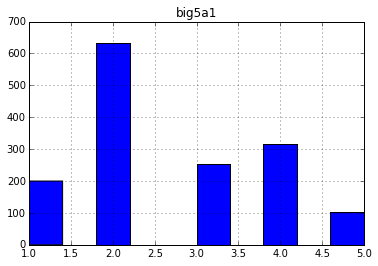

In [18]:
d.hist(column='big5a1')

2--I chose to look at a variable, ​mntlhlth​, that investigates how many days in the past 30 days, the respondents found their mental health was not good, meaning it contained stress, depression andproblems with emotions, ranging from 0 to 30 days, as Table 3 indicates.  

I looked at differences in mean and median days (and standard deviations) of poor mental health days, by sex.  I chose to compare men and women in this way because I knew there was a literature that finds that women admit to more mental health distress than men do, and I wanted to see if it would bevisible in the GSS 2006 data.  

As Table 4 shows, women report an average of 3.3 days of poor mental health (with a standard deviation of 6.5 days), while men report 2.7 days (and a standarddeviation of 6.8).  On a hopeful note, they both have a median of 0 poor mental health days,which means that the typical (50th percentile) man ​or​ woman has no days of poor mental health.   These results make sense: most people report no days of poor mental health,while a small proportion of people experience much more chronic issues around it.  The very high standard deviations for both sexes indicate how skewed this variable is for both sexes.  

These results seem to line up with previous research too on sex differences in mental health experience, as hypothesized.  

By the way, on the face of it, it looks like more women than men answered this question: 885 vs. 832 respectively, whcih mimics the survey overall, with 2507 women surveyed vs. 2003 men surveyed respectively (see SEX variable in the codebook).


From the codebook, Table 3 is: 

458) Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (MNTLHLTH)
        TOTAL %
0) 0	1098 63.3
1) 1	62	3.6
2) 2	124	7.2
3) 3	76	4.4
4) 4	48	2.8
5) 5	77	4.4
6) 6	11	0.6
7) 7	27	1.6
8) 8	3	0.2
10) 10	45	2.6
12) 12	4	0.2
14) 14	6	0.3
15) 15	40	2.3
17) 17	1	0.1
20) 20	25	1.4
22) 22	1	0.1
25) 25	4	0.2
27) 27	2	0.1
28) 28	3	0.2
29) 29	2	0.1
30) 30	58	3.3
98) Don't know	6	0.3
99) No answer	11	0.6
Missing	2776	 
TOTAL	1734	100.0



In [8]:
##Table 4 ##

d.groupby(['sex'])['mntlhlth'].mean()

sex
1      2.661058
2      3.318644
Name: mntlhlth, dtype: float64

In [24]:
d.groupby(['sex'])['mntlhlth'].median()

sex
1      0
2      0
Name: mntlhlth, dtype: float64

In [9]:
d.groupby(['sex'])['mntlhlth'].std()

sex
1      6.513193
2      6.824575
Name: mntlhlth, dtype: float64

In [21]:
d.groupby(['sex'])['mntlhlth'].count()

sex
1      832
2      885
Name: mntlhlth, dtype: int64

3-- I chose to look at a variable, ​acqcohab​, that investigates how many women that a respondent is acquainted with who live with a man who is not their husband; as Table 5 indicates, the variable is ordinal in nature, ranging from knowing no women (0) to knowing just 1, to knowing somewhere between 2­5 (category 3), to 6­10 women (#4) or to a maximum of 11 or more women (category 5).  

I wanted to cross­tabulate that variable with a person's marital status (delineated in Table 6), named “​marital​,” hypothesizing that never married people would bemore acquainted with cohabiting women, since they probably interact with more non­married people who might be cohabiting with someone; likewise, I expected married people to interact predominantly with other married people.  I wasn't quite sure if divorced people would look like married or never­married Americans.  

The results in Table 7 largely support my hypotheses.  

Looking down the columns, nearly 43% of married Americans (look to Column 1) say that they know no women who are cohabiting, while only 22% of never married people (look to Column 5) claim to know no cohabiting women.  Divorced people do fall right in between the two extremes established by married vs. single people, so 28% of divorced people do not know anycohabiting women (greater than the never­married 22%, but less than the married 43%).  

It is possible that it is not marital status per se that matters, but actually simply age, with younger people less likely to be married in the first place and also more likely to be cohabitingthemselves.  These two things ­­­ age and marital patterns ­­ are hard to separate out.  

I have a boxplot that illustrates the same results too.

From the codebook, Table 5 is:

653) How many of the women that you are acquainted with are you pretty certain live in a romantic relationship with a man to whom they are not married? (ACQCOHAB)
              TOTAL	%
1) 0	        219	31.8
2) 1	        87	12.6
3) 2-5	        213	30.9
4) 6-10	        41	6.0
5) More than 10	67	9.7
8) Don't know	47	6.8
9) No answer	15	2.2
Missing	      3821	 
TOTAL	       689	100.0


From the codebook, Table 6 is:

12) Are you currently -- married, widowed, divorced, separated, or have you never been married? (MARITAL)
                    TOTAL	%
1) Married	        2170	48.1
2) Widowed	        366	    8.1
3) Divorced	        732	    16.2
4) Separated	    156	    3.5
5) Never married	1080	23.9
9) No answer	    6	    0.1
TOTAL	            4510	100.0



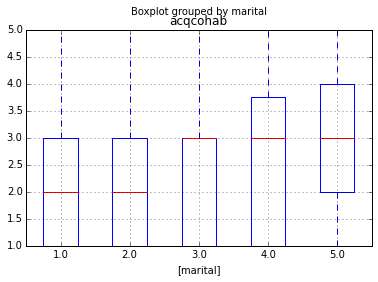

In [11]:
%matplotlib inline
d.boxplot(column='acqcohab', by=['marital'])

In [13]:
## Table 7 ##

res = pd.crosstab(d.acqcohab, d.marital)
res.astype('float').div(res.sum(axis=0), axis=1)

marital,1.0,2.0,3.0,4.0,5.0
acqcohab,,,,,
1,0.427632,0.423077,0.281553,0.357143,0.215686
2,0.161184,0.134615,0.135922,0.071429,0.104575
3,0.309211,0.384615,0.368932,0.285714,0.366013
4,0.042763,0.000000,0.077670,0.214286,0.111111
5,0.059211,0.057692,0.135922,0.071429,0.202614
